In [1]:
import requests
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
urls = [
    "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
]

In [3]:
# def download_data(file,target):
#     res = requests.get(file)
#     with open(target , 'wb') as file:
#      file.write(res.content)
# download_data(urls[0], 'train_images.gz')
# download_data(urls[1], 'train_labels.gz')
# download_data(urls[2], 'test_images.gz')
# download_data(urls[3], 'test_labels.gz')

In [4]:
import gzip
def image_process(file_name) : 
    with gzip.open(file_name,"rb") as file : 
        Data =  np.frombuffer(file.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)
    with gzip.open('train_label.gz', 'rb') as f:
        # Data = Data/255
        return Data.reshape(-1,28,28)
def label_process(file_name) : 
    with gzip.open(file_name,"rb") as file : 
        Data = np.frombuffer(file.read(), dtype=np.uint8, offset=8)
        return Data

In [5]:
x_train = image_process("train_images.gz")
x_test  = image_process("test_images.gz")
y_train = label_process("train_label.gz")
y_test  = label_process("test_label.gz")

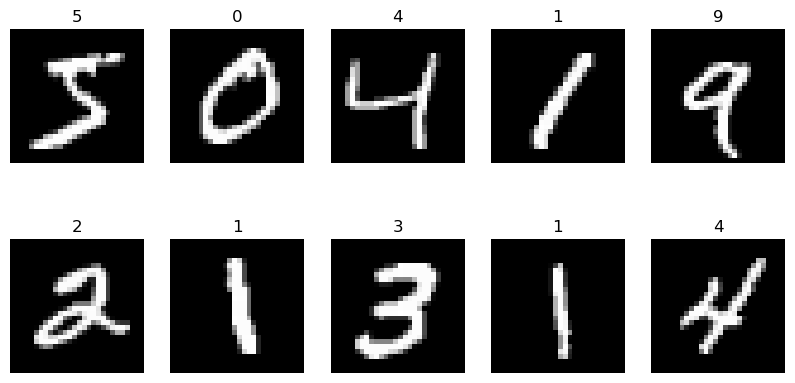

In [6]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,5)
axs=axs.ravel()

for i in range(10) : 
    axs[i].imshow(x_train[i],cmap='gray')
    axs[i].set_title(str(y_train[i]))
    axs[i].axis('off')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train.reshape((-1,28*28)),y_train)

C:\Users\WIN 8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred = model.predict(x_test.reshape(-1,28*28))

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9255
